# **Project Everest Report - Jakub Bartnik**

## GitHub URL 
https://github.com/jakubbartnik/UCDPA_jakubbartnik

##Abstract 
(short overview  of entire project and features)
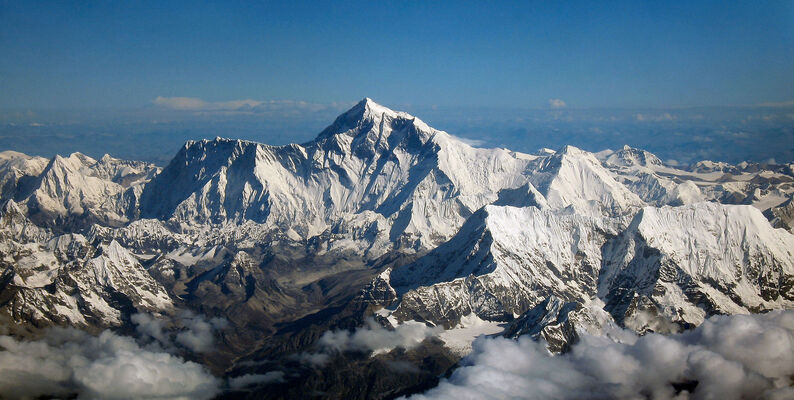


Mount Everest is the highest peak on Earth. Many climbers died trying to reach it, anothers had to abandoned climb due to unsufficient supplies or bad weather. In year 2020 climbing from niche hobby of few has became an olimpic sport discipline. The way people climb within last 100 years has changed completly. Equipment like climbing carabiner was not known before 1910, how those climbers protect themselfs before that year? In 1923 Numerical grading system to identify difficulty of the climb was developed. Climbing shoes were first made in 1935. Friend was a revolutionary piece of protection that was introduced in 1973.... 

##Introduction
(why you choose this project use case, what the hell I want to find from this dataset)

##Dataset
(provide description of your datase4t and source. Also justyfy why you chose this source.)


The Himalayan Database is a compilation of records for all expeditions that have climbed in the Nepal Himalaya. The database is based on the expedition archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it is supplemented by information gathered from books, alpine journals and correspondence with Himalayan climbers.

The data cover all expeditions from 1905 through Spring 2019 to more than 465 significant peaks in Nepal. Also included are expeditions to both sides of border peaks such as Everest, Cho Oyu, Makalu and Kangchenjunga as well as to some smaller border peaks. Data on expeditions to trekking peaks are included for early attempts, first ascents and major accidents.


##Implementation Process
(describe your entire process in detail)

1. overview on data and merging

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#importing everest data 
df_exp = pd.read_csv('/content/everest_data/expeditions.csv')
df_peaks = pd.read_csv('/content/everest_data/peaks.csv')
df_mem = pd.read_csv('/content/everest_data/members.csv')

#basic overview on data
print(df_exp.shape)
print(df_peaks.shape)
print(df_mem.shape)


Looking at expeditions.csv

In [ ]:
df_exp.head()

Looking at peaks.csv

In [ ]:
df_peaks.head()

Looking at members.csv

In [ ]:
df_mem.head()

Merging expeditions_set with peak_set to make it easy on myslef from looking at above results I can see I can merge on peak_id

In [ ]:
df1 =df_exp.merge(df_peaks ,on ='peak_id') 
print(df1.shape) 
df1.head()

I am going to use result of merge - df1 with members.csv based on expedition_id

In [ ]:
df = df1.merge(df_mem ,on ='expedition_id') 
print(df.shape) 
df.head()

##Results
(include the charts and describe them

##Insights
(point out at least 5 insights in bullet points

###References

Data_set - https://www.kaggle.com/datasets/majunbajun/himalayan-climbing-expeditions

###Jakub Checklist 

This section is for me to make sure I am verifying myself according to quidelines
- [ ] this document contain 1500 to 2000 words
1. Real-world Scenario
- [x] project is using real-world dataset and include reference in report(5)
2. Importing data
- [ ] making use of API, relational db, webscrapping(10)
- [x] imported CSV file into pandas DT(10)
3. Analysing Data
- [ ] used regex to extract pattern in data(10)
- [ ] replaced missing values or droped duplicates(10)
- [ ] used iterators (5)
- [x] Merged DataFrames(5)
4. Python
- [ ] defined a customer function to create reusable code (5)
- [ ] NumPy (5)
- [ ] Dictionary or lists (5)
5. Machine Learning (30)
- [ ] Predict Target variable with Supervised or Unsupervised algorithm (any alg. you like)
- [ ] Perform Hyper Parameter tuning or boosting if relevant if not just justyfy that in report and Python comments
6. Visualise
- [ ] Present two charts in Seaborn or Matplotlib (10)
7. Generate valuable Insights
- [ ] mentioned 5 insights from the Project(10)
8. Report(30)

